Exp:-1    To perform the basic pre-processing operations on data relation such as removing an attribute and filter attribute using python.


In [5]:
import pandas as pd
import seaborn as sns

# load the iris dataset from the seaborn library
iris = sns.load_dataset('iris')

# rename the 'species' column to 'class'
iris = iris.rename(columns={'species': 'class'})

# convert the categorical 'class' column to numerical
iris['class'] = iris['class'].astype('category')
iris['class'] = iris['class'].cat.codes

# standardize the 'sepal_width' and 'petal_length' columns
iris['sepal_width'] = (iris['sepal_width'] - iris['sepal_width'].mean()) / iris['sepal_width'].std()
iris['petal_length'] = (iris['petal_length'] - iris['petal_length'].mean()) / iris['petal_length'].std()

# filter the iris dataset to include only rows where the 'sepal_width' is greater than 0.5
iris = iris[iris['sepal_width'] > 0.5]

# display the first 5 rows of the filtered dataset
print("Filtered Dataset:")
print(iris.head())



Filtered Dataset:
   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1     1.015602     -1.335752          0.2      0
4           5.0     1.245030     -1.335752          0.2      0
5           5.4     1.933315     -1.165809          0.4      0
6           4.6     0.786174     -1.335752          0.3      0
7           5.0     0.786174     -1.279104          0.2      0


Exp:-2 To predict the numerical values in the given dataset using regression methods in  python.


Mean Squared Error: 21.517444231177272


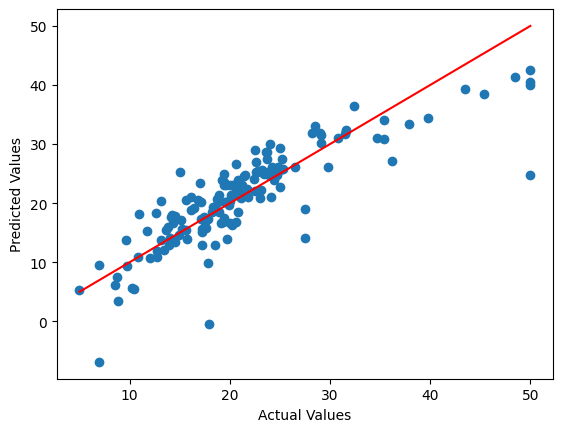

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch the Boston housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert the dataset to a pandas DataFrame
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=feature_names)
df['MEDV'] = target

# Standardize the features
scaler = StandardScaler()
X = df.drop('MEDV', axis=1)
X = scaler.fit_transform(X)

# Split the data into training and testing sets
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)

# Plot the actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


Exp:-3   To predict with the smallest total error using rules based on one attribute in  python.


In [3]:
import pandas as pd
import numpy as np

# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# convert the iris dataset to a pandas data frame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# calculate the average target value for each unique value of the 'petal length' attribute
grouped = df.groupby('petal length (cm)').mean()

# create a dictionary to store the mapping from petal length to target
mapping = {}
for row in grouped.iterrows():
    mapping[row[0]] = row[1]['target']

# use the mapping to predict the target values for each row in the original data frame
df['prediction'] = df['petal length (cm)'].apply(lambda x: mapping[x])

# calculate the mean squared error
mse = np.mean((df['prediction'] - df['target'])**2)
print("Mean Squared Error:", mse)

# print the predicted target values
print("Predicted Target Values:")
print(df['prediction'])


Mean Squared Error: 0.03133333333333333
Predicted Target Values:
0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    2.000
146    1.750
147    2.000
148    2.000
149    1.875
Name: prediction, Length: 150, dtype: float64


Exp:-4  To build a hierarchy of clusters using hierarchical clustering techniques in  python.


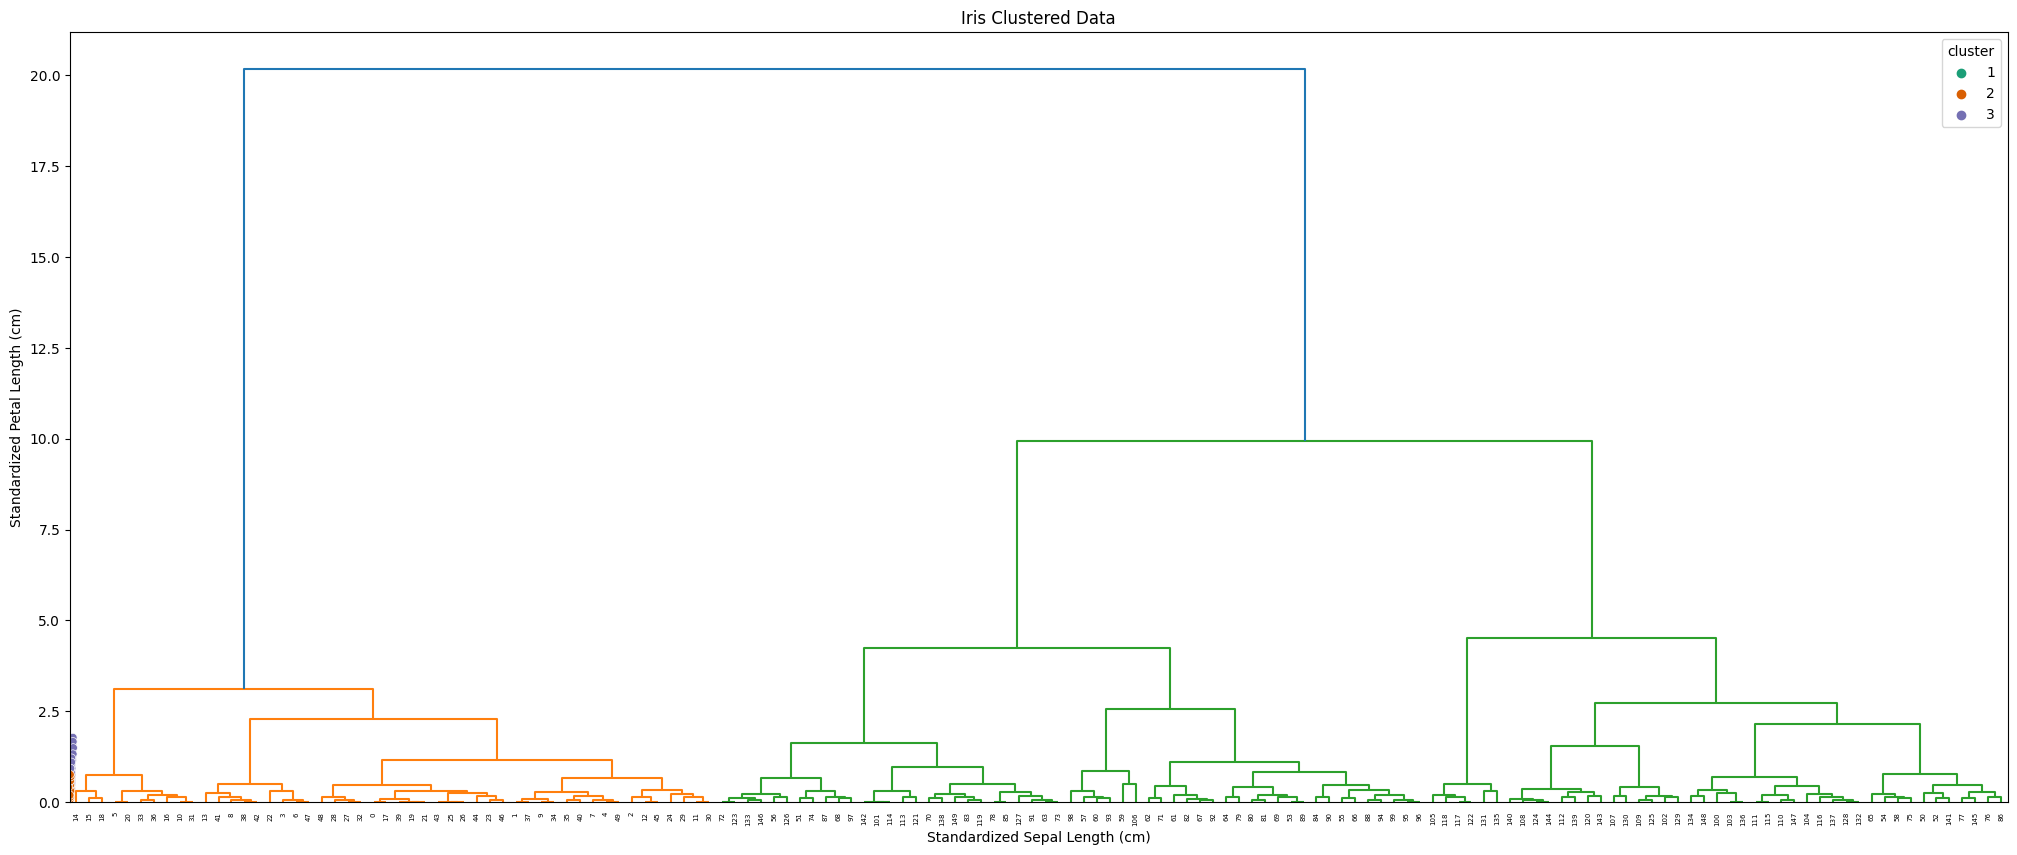

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# load the iris dataset
iris = load_iris()

# convert the iris dataset to a pandas data frame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# standardize the 'sepal length' and 'petal length' columns
df['sepal length (cm)'] = (df['sepal length (cm)'] - df['sepal length (cm)'].mean()) / df['sepal length (cm)'].std()
df['petal length (cm)'] = (df['petal length (cm)'] - df['petal length (cm)'].mean()) / df['petal length (cm)'].std()

# calculate the linkage matrix
Z = linkage(df[['sepal length (cm)', 'petal length (cm)']], 'ward')

# extract the cluster labels
labels = fcluster(Z, 3, criterion='maxclust')

# add the cluster labels to the data frame
df['cluster'] = labels

# plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.title("Iris Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# plot the scatter plot of the data
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal length (cm)'], hue=df['cluster'], palette='Dark2')
plt.title("Iris Clustered Data")
plt.xlabel("Standardized Sepal Length (cm)")
plt.ylabel("Standardized Petal Length (cm)")

plt.show()



Exp:-5  To demonstrate clustering features in large databases with noise in  python.


Shape of X: (500, 5)


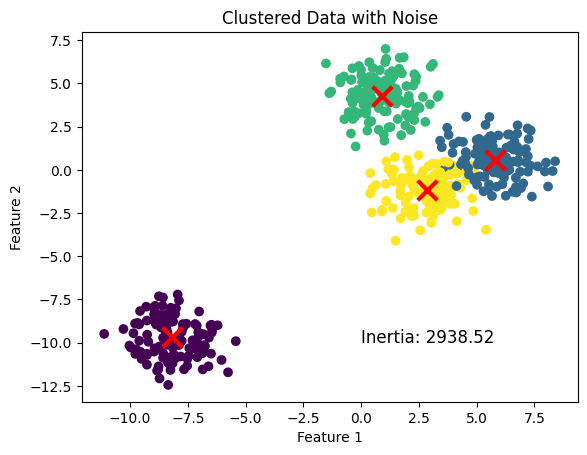

Cluster 0: 125 samples
Cluster 1: 125 samples
Cluster 2: 125 samples
Cluster 3: 125 samples


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate a synthetic dataset with 500 samples and 5 features
X, y = make_blobs(n_samples=500, n_features=5, centers=4, random_state=0)

# add some random noise to the dataset
X = X + np.random.randn(500, 5) * 0.5

# check the shape of X
print("Shape of X:", X.shape)

try:
    # fit the KMeans model to the data
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)

    # predict the cluster labels for each data point
    labels = kmeans.predict(X)

    # plot the data points with different colors for each cluster
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title("Clustered Data with Noise")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # display the cluster centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

    # display the sum of squared distances of samples to their closest cluster center
    inertia = kmeans.inertia_
    plt.text(0, -10, "Inertia: {:.2f}".format(inertia), fontsize=12)

    plt.show()

    # print the cluster labels and corresponding count for each cluster
    unique, counts = np.unique(labels, return_counts=True)
    for i in range(len(unique)):
        print("Cluster {}: {} samples".format(unique[i], counts[i]))

except Exception as e:
    print("Error:", str(e))


Exp:-6  : To write python code to implement apriori algorithm.


In [6]:
# import required libraries
import itertools

# define a function to generate frequent itemsets
def generate_frequent_itemsets(transactions, min_support):
    
    # Step 1: Create a dictionary of candidate items and their counts
    candidate_items = {}
    for transaction in transactions:
        for item in transaction:
            if item in candidate_items:
                candidate_items[item] += 1
            else:
                candidate_items[item] = 1
    
    # Step 2: Generate frequent itemsets
    frequent_itemsets = []
    for item, count in candidate_items.items():
        if count/len(transactions) >= min_support:
            frequent_itemsets.append([item])
            
    k = 2
    while True:
        candidate_itemsets = [frozenset(itemset) for itemset in itertools.combinations(set.union(*map(set, frequent_itemsets)), k)]
        if not candidate_itemsets:
            break
        
        candidate_counts = {itemset: 0 for itemset in candidate_itemsets}
        for transaction in transactions:
            for itemset in candidate_itemsets:
                if itemset.issubset(transaction):
                    candidate_counts[itemset] += 1
        
        frequent_itemsets_k = []
        for itemset, count in candidate_counts.items():
            if count/len(transactions) >= min_support:
                frequent_itemsets_k.append(list(itemset))
                
        if not frequent_itemsets_k:
            break
                
        frequent_itemsets.extend(frequent_itemsets_k)
        k += 1
        
    return frequent_itemsets

transactions = [
    ['apple', 'banana', 'cherry'],
    ['apple', 'banana'],
    ['apple', 'pear'],
    ['banana']
]
min_support = 0.5

frequent_itemsets = generate_frequent_itemsets(transactions, min_support)
print(frequent_itemsets)


[['apple'], ['banana'], ['apple', 'banana']]


Exp:-7  To perform the basic pre-processing operations on data relation such as removing an attribute and filter attribute using H2O library python.


In [7]:
%pip install h2o
import h2o
h2o.init()

iris=h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
print(iris)

iris = iris[:, 1:]
print(iris.names)

iris = iris[:, ["C2", "C3"]]
print(iris)

h2o.shutdown()




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 16.0.2+7-67, mixed mode, sharing)
  Starting server from C:\Users\Hariprasath\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HARIPR~1\AppData\Local\Temp\tmpkuk1gpvq
  JVM stdout: C:\Users\HARIPR~1\AppData\Local\Temp\tmpkuk1gpvq\h2o_Hariprasath_started_from_python.out
  JVM stderr: C:\Users\HARIPR~1\AppData\Local\Temp\tmpkuk1gpvq\h2o_Hariprasath_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_Hariprasath_714368
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.838 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  C1    C2    C3    C4  C5
 5.1   3.5   1.4   0.2  Iris-setosa
 4.9   3     1.4   0.2  Iris-setosa
 4.7   3.2   1.3   0.2  Iris-setosa
 4.6   3.1   1.5   0.2  Iris-setosa
 5     3.6   1.4   0.2  Iris-setosa
 5.4   3.9   1.7   0.4  Iris-setosa
 4.6   3.4   1.4   0.3  Iris-setosa
 5     3.4   1.5   0.2  Iris-setosa
 4.4   2.9   1.4   0.2  Iris-setosa
 4.9   3.1   1.5   0.1  Iris-setosa
[150 rows x 5 columns]

['C2', 'C3', 'C4', 'C5']
  C2    C3
 3.5   1.4
 3     1.4
 3.2   1.3
 3.1   1.5
 3.6   1.4
 3.9   1.7
 3.4   1.4
 3.4   1.5
 2.9   1.4
 3.1   1.5
[150 rows x 2 columns]

H2O session _sid_bc9a closed.


C:\Users\Hariprasath\AppData\Local\Temp\ipykernel_9264\3139267127.py:14: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


Exp:-8 To predict the numerical values in the given dataset using regression methods in  H2O python library.


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 16.0.2+7-67, mixed mode, sharing)
  Starting server from C:\Users\Hariprasath\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HARIPR~1\AppData\Local\Temp\tmp0uigzl27
  JVM stdout: C:\Users\HARIPR~1\AppData\Local\Temp\tmp0uigzl27\h2o_Hariprasath_started_from_python.out
  JVM stderr: C:\Users\HARIPR~1\AppData\Local\Temp\tmp0uigzl27\h2o_Hariprasath_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_Hariprasath_78x347
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.838 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Mean Squared Error: 32.78175296277362


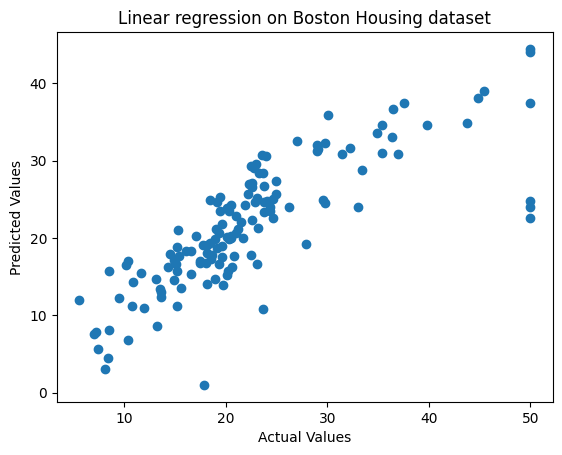

H2O session _sid_b6cb closed.


C:\Users\Hariprasath\AppData\Local\Temp\ipykernel_9264\1538744562.py:27: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


In [8]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import numpy as np
import matplotlib.pyplot as plt
h2o.init()

data=h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/gbm_test/BostonHousing.csv")

train, valid = data.split_frame(ratios=[0.7], seed=1234)

predictors = data.columns[:-1]  
response = data.columns[-1]	 

model = H2OGeneralizedLinearEstimator(family="gaussian", link="identity")
model.train(x=predictors, y=response, training_frame=train)
predictions = model.predict(valid)
pred_vals = predictions.as_data_frame().values.flatten()
act_vals = valid[response].as_data_frame().values.flatten()
mse = np.mean((act_vals - pred_vals) ** 2)
print("Mean Squared Error:", mse)
plt.scatter(act_vals, pred_vals)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear regression on Boston Housing dataset")
plt.show()

h2o.shutdown()
